In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [10]:
# 3
BATCH_SIZE = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


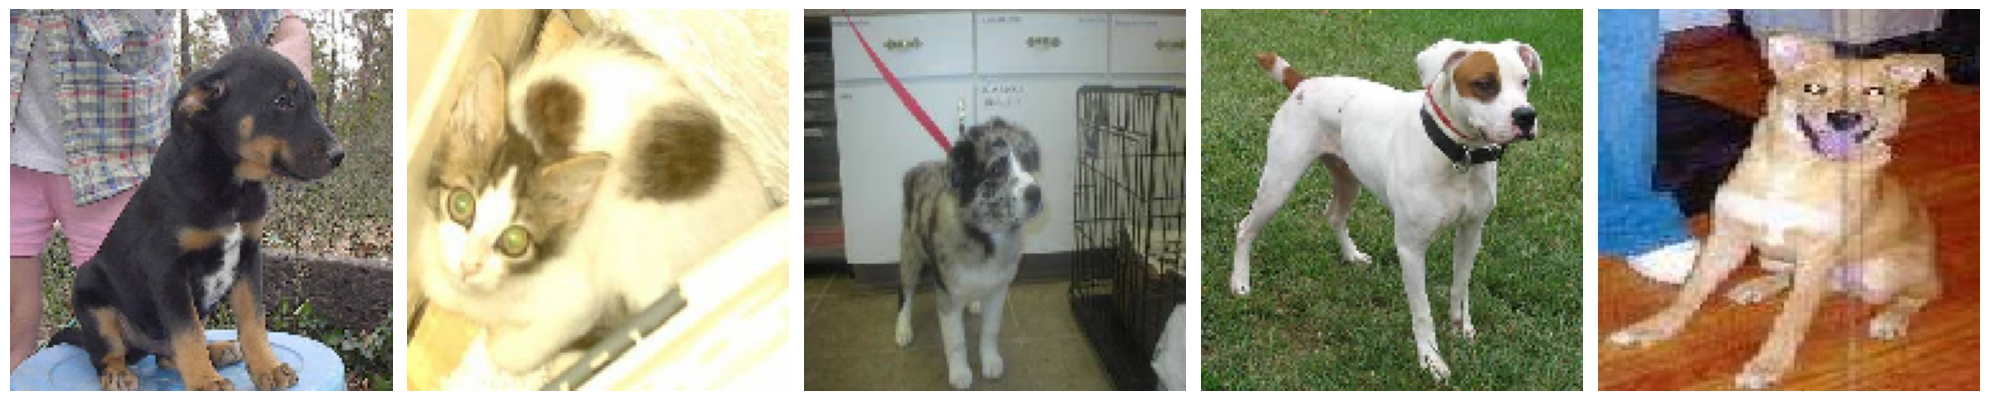

In [11]:
# 4
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [12]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Found 2000 images belonging to 2 classes.


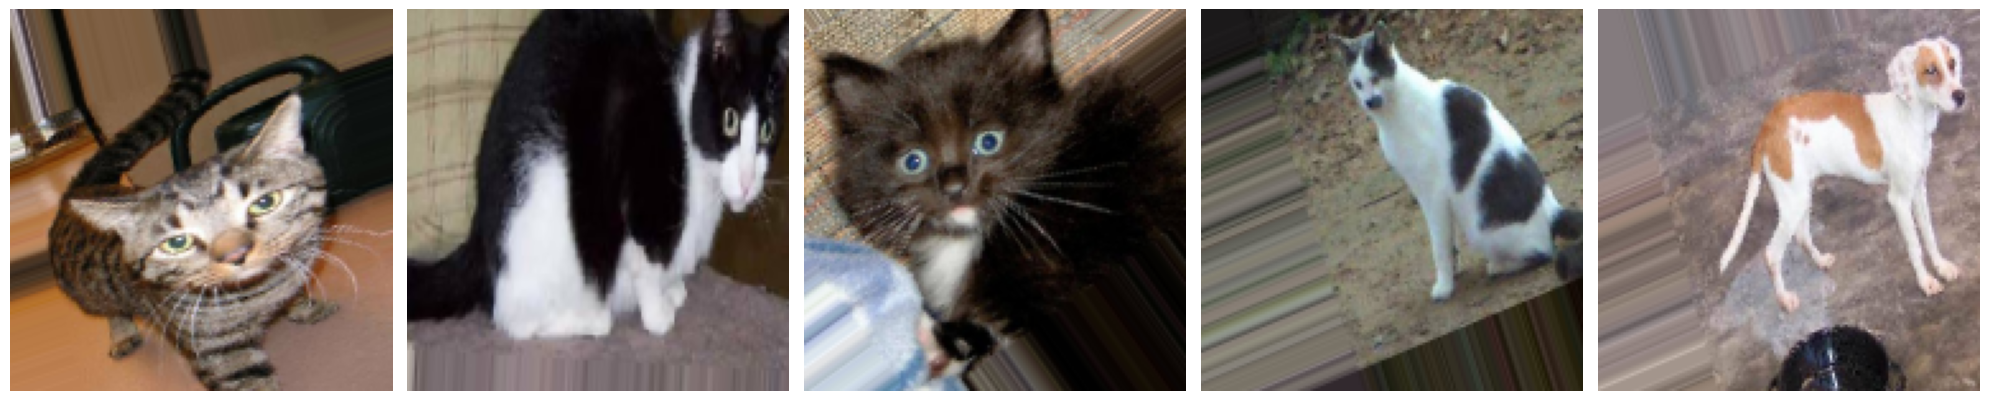

In [13]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

augmented_images, _ = next(train_data_gen)
plotImages(augmented_images[:5])

In [14]:
# 7
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# 8
EPOCHS = 5

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=total_val // BATCH_SIZE
)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.6045 - loss: 0.6730 - val_accuracy: 0.6330 - val_loss: 0.6435
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 144s 7s/step - accuracy: 0.6019 - loss: 0.6622 - val_accuracy: 0.6240 - val_loss: 0.6393
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 150s 7s/step - accuracy: 0.6398 - loss: 0.6381 - val_accuracy: 0.6760 - val_loss: 0.6024
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 196s 7s/step - accuracy: 0.6636 - loss: 0.6201 - val_accuracy: 0.6530 - val_loss: 0.6286
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.6031 - loss: 0.6547 - val_accuracy: 0.6420 - val_loss: 0.6190


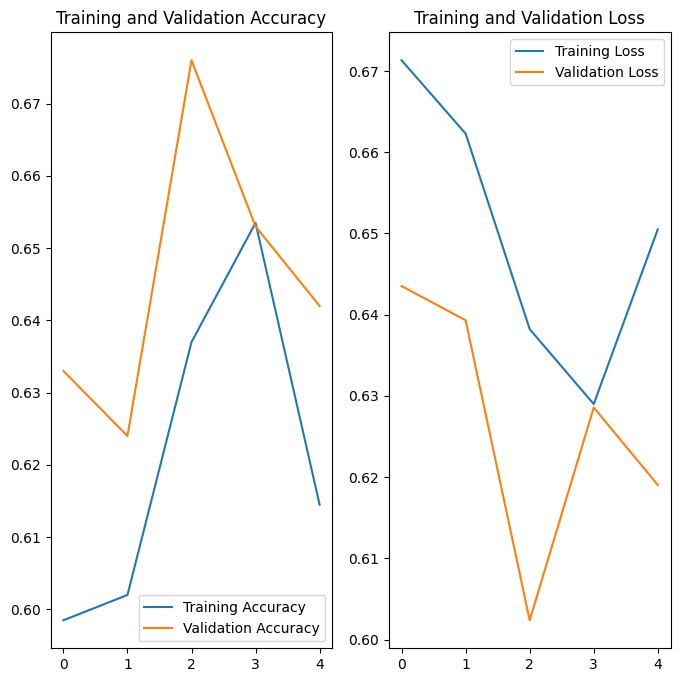

In [17]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
# 10
# Create a test image generator
test_image_generator = ImageDataGenerator(rescale=1./255)

# Load test images
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Check if test_data_gen has images
if len(test_data_gen) == 0:
    print("No images found in the test directory.")
else:
    # Predict probabilities for test images
    probabilities = model.predict(test_data_gen)
    probabilities = [1 if prob > 0.5 else 0 for prob in probabilities]

    # Get test images
    test_images = []
    for i in range(len(probabilities)):
        test_images.append(test_data_gen[i][0])

    # Plot test images with probabilities
    plotImages(test_images[:5], probabilities[:5])

Found 0 images belonging to 0 classes.
No images found in the test directory.


In [24]:
# 11
# Enhanced Cell 11: Check Accuracy

# Create a test image generator
test_image_generator = ImageDataGenerator(rescale=1./255)

# Load test images
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Check if test_data_gen has images
if len(test_data_gen) == 0:
    print("No images found in the test directory.")
else:
    # Predict probabilities for test images
    probabilities = model.predict(test_data_gen)
    probabilities = [1 if prob > 0.5 else 0 for prob in probabilities]

    # Get test images
    test_images = []
    for i in range(len(probabilities)):
        test_images.append(test_data_gen[i][0])

    # Plot test images with probabilities
    plotImages(test_images[:5], probabilities[:5])

    # Calculate accuracy
    correct_predictions = 0
    for i in range(len(probabilities)):
        if probabilities[i] == test_data_gen.classes[i]:
            correct_predictions += 1

    accuracy = correct_predictions / len(probabilities)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

    # Run unit tests
    !python3 test_module.py

Found 0 images belonging to 0 classes.
No images found in the test directory.
